# Energy Efficiency Project


This project analyzes the Energy Efficiency dataset (ENB2012) to predict Heating Load (Y1) and Cooling Load (Y2) based on building design parameters (X1–X8). We will perform exploratory data analysis (EDA), build predictive models, and compare their performance

**Importing Required Libraries**

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Loading the Data
We load the dataset and check its structure.

In [11]:
df = pd.read_excel("/ENB2012_data.xlsx")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


The dataset contains 768 entries with 8 features (X1–X8) and 2 targets (Y1, Y2)

# **Exploratory Data Analysis**
We check dataset statistics, unique values, and missing values.

In [13]:
df.nunique()
print(df.describe())

               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307195   24.587760  
std      0.133221    1.55096   10.090204    9.513306  
min      0.000000    0.00000    6.010000   10.900000  
25% 

In [14]:
df.isnull().sum()

,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
Y1,0
Y2,0


The data is clean, with no missing values. Feature ranges vary significantly.



# Correlation Analysis
We visualize correlations between features and targets.

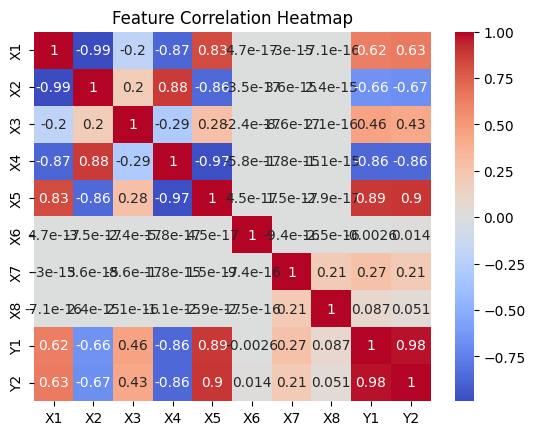

In [15]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Some input features show stronger correlations with heating and cooling loads, suggesting their importance in prediction.



# **Data** **Visualization**

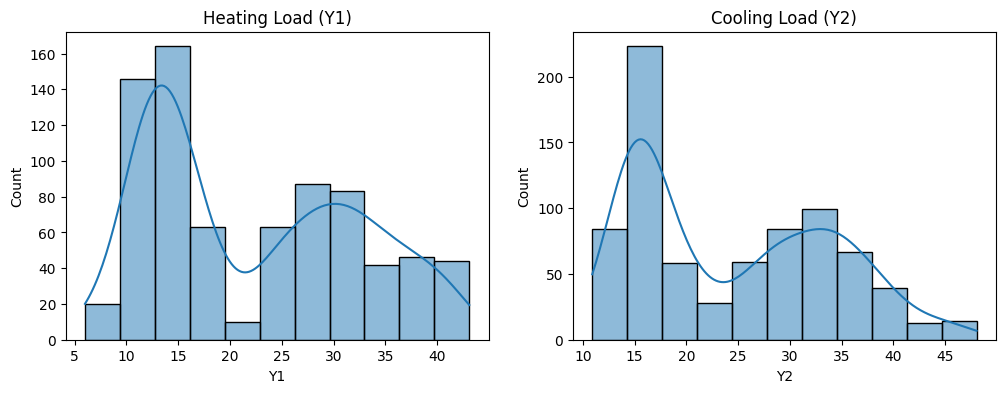

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Y1'], kde=True, ax=axes[0])
axes[0].set_title("Heating Load (Y1)")
sns.histplot(df['Y2'], kde=True, ax=axes[1])
axes[1].set_title("Cooling Load (Y2)")
plt.show()

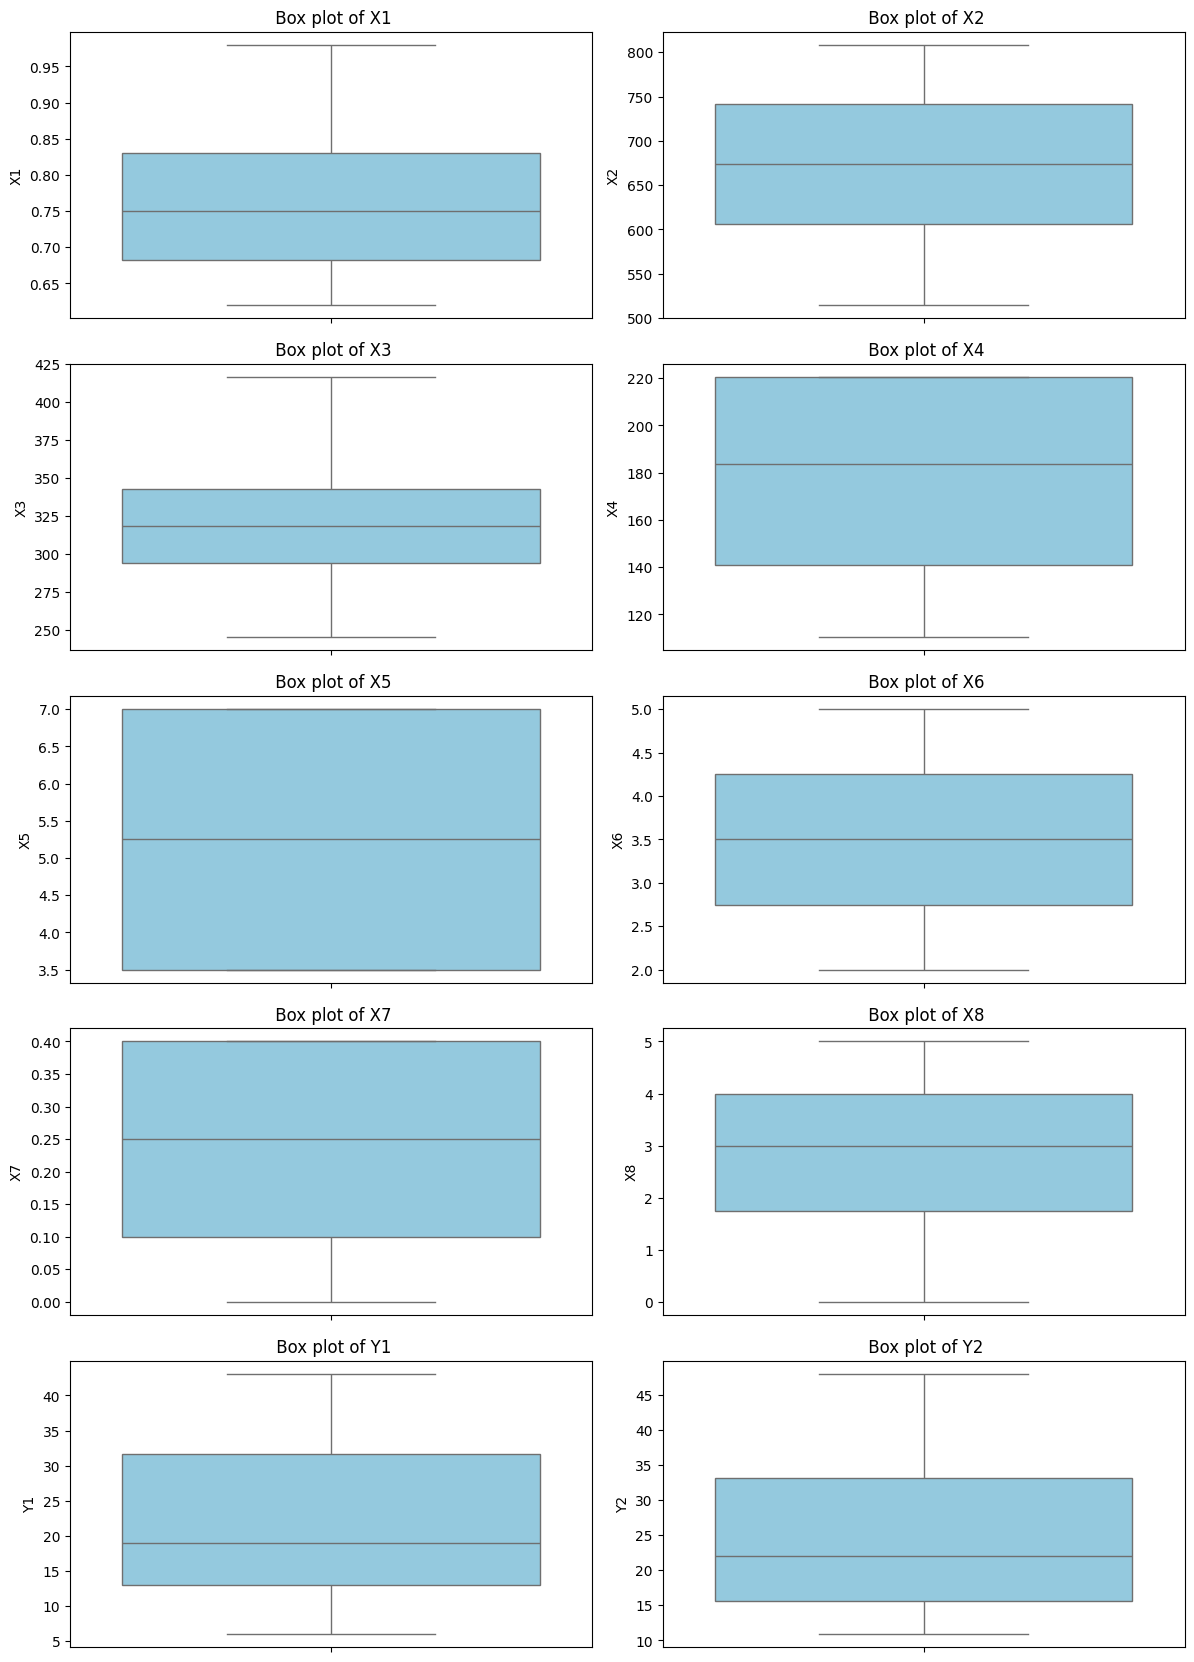

In [17]:
num_columns=  df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize=(12,20))
for i ,col in enumerate(num_columns,1):
    plt.subplot(len(num_columns) // 2+1, 2, i)
    sns.boxplot(y=df[col],color="skyblue")
    plt.title(f" Box plot of {col}")
plt.tight_layout()
plt.show()

# **Checking for Outliers**

Text(0, 0.5, 'values')

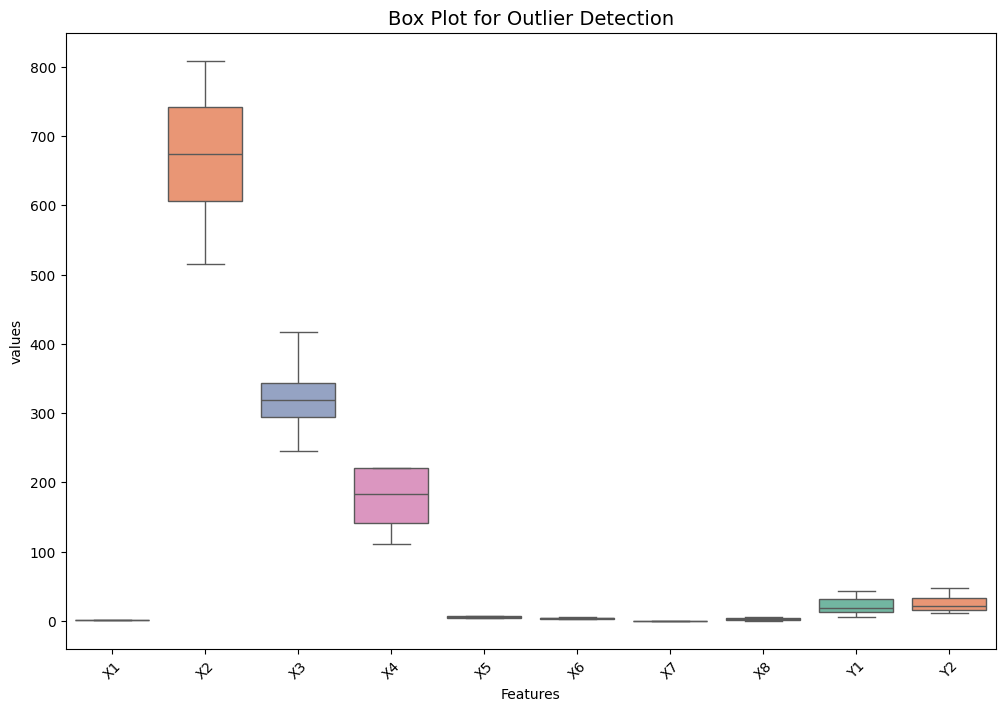

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, orient ="v",palette="Set2")
plt.title("Box Plot for Outlier Detection",fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("values")

#Using  Linear Regression Model

In [19]:
X=df.iloc[:,:-2]
Y1=df["Y1"]
Y2=df["Y2"]
X_train, X_test, Y1_train, Y1_test = train_test_split(X,Y1,test_size=0.2,random_state=42)
X_train, X_test, Y2_train, Y2_test = train_test_split(X,Y2,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_model_Y1 = LinearRegression()
lr_model_Y2 = LinearRegression()

lr_model_Y1.fit(X_train_scaled,Y1_train)
lr_model_Y2.fit(X_train_scaled,Y2_train)

Y1_lr_pred = lr_model_Y1.predict(X_test_scaled)
Y2_lr_pred = lr_model_Y2.predict(X_test_scaled)

rmse_lr_Y1 = mean_squared_error(Y1_test, Y1_lr_pred)**0.5
r2_lr_Y1 = r2_score(Y1_test, Y1_lr_pred)

rmse_lr_Y2 = mean_squared_error(Y2_test, Y2_lr_pred)**0.5
r2_lr_Y2 =r2_score(Y2_test, Y2_lr_pred)

print(f"LinearRegression - Heating Load(Y1): RSME ={rmse_lr_Y1 :.2f},R^2={r2_lr_Y1:.4f}")
print(f"LinearRegression - Cooling Load(Y2): RSME ={rmse_lr_Y2 :.2f},R^2={r2_lr_Y2:.4f}")

LinearRegression - Heating Load(Y1): RSME =3.03,R^2=0.9122
LinearRegression - Cooling Load(Y2): RSME =3.15,R^2=0.8932


Linear Regression gives a baseline performance. The R² score indicates how much variance in heating load is explained by the features

# Using RandomForest Regressor

In [20]:
X=df.iloc[:, :-2]
Y1= df["Y1"]
Y2= df["Y2"]
X_train, X_test, Y1_train, Y1_test = train_test_split(X,Y1, test_size = 0.2, random_state=42)
X_train, X_test, Y2_train, Y2_test = train_test_split(X,Y2, test_size = 0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf= RandomForestRegressor(n_estimators=100,random_state=42)


rf.fit(X_train_scaled, Y1_train)
rf.fit(X_train_scaled, Y2_train)

Y1_rf_pred = rf.predict(X_test_scaled)
Y2_rf_pred = rf.predict(X_test_scaled)

rmse_rf_Y1 = mean_squared_error(Y1_test, Y1_rf_pred)**0.5
r2_rf_Y1= r2_score(Y1_test, Y1_rf_pred)

rmse_rf_Y2= mean_squared_error(Y2_test,Y2_rf_pred)**0.5
r2_rf_Y2 = r2_score(Y2_test,Y2_rf_pred)
print(f"RandomForestRegressor - Heating Load(Y1): RSME ={rmse_rf_Y1:.2f},R^2 ={r2_rf_Y1:.4f}")
print(f"RandomForestRegressor - cooling Load(Y2) : RSME={rmse_rf_Y2: .2f},R^2 ={r2_rf_Y2:.4f}")

RandomForestRegressor - Heating Load(Y1): RSME =2.80,R^2 =0.9248
RandomForestRegressor - cooling Load(Y2) : RSME= 1.73,R^2 =0.9679


Random Forest outperforms Linear Regression, capturing non-linear relationships better.


# Feature Importance Analysis
We identify which input features (X1–X8) have the greatest influence on predicting heating and cooling loads. This helps in understanding which building design parameters impact energy efficiency the most

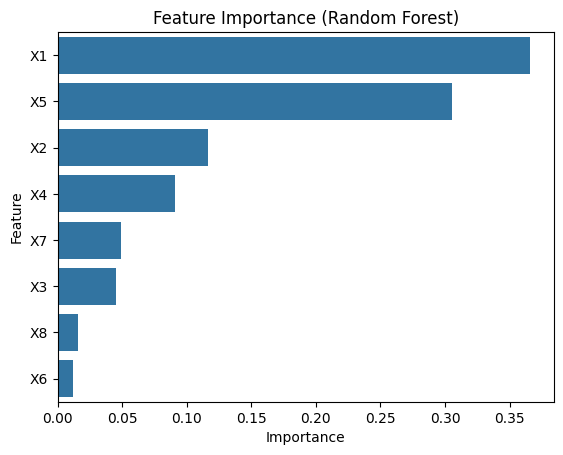

In [22]:
importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance (Random Forest)")
plt.show()

# **Conclusion:**

*   The feature importance analysis shows that certain
building parameters (such as relative compactness, surface area, wall area, and roof area) have a much stronger impact on energy efficiency compared to others. This suggests that optimizing these design aspects can significantly reduce heating and cooling loads.


*  Random Forest performed best among tested models.


*  Future work: Try hyperparameter tuning and additional models (e.g., Gradient Boosting).





